## Data Preprocessing

In [1]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading in dataset for cleaning and preprocessing
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path)

#viewing the dataframe
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# count how many 'True' and 'False' values there are in the dataframe
crypto_df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [4]:
# filter for currencies that have been traded
crypto_df = crypto_df[crypto_df['IsTrading']==True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# dropping "IsTrading" and "CoinName" columns from dataframe
crypto_df2 = crypto_df.drop(columns = ['IsTrading', 'CoinName', 'Unnamed: 0'])

#viewing the updated dataframe
crypto_df2

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1243,Ethash,PoW,NaN,1000000000
1244,SHA-256,DPoI,NaN,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [6]:
# identifying rows with null values
for column in crypto_df2.columns:
    print(f"Column {column} has {crypto_df2[column].isnull().sum()} null values")

Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [7]:
# removing null values from data set
crypto_df3 = crypto_df2.dropna()

crypto_df3

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
# filtering for total number of mined coins greater than 0
crypto_df4 = crypto_df3[crypto_df3['TotalCoinsMined'] > 0]
crypto_df4.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [9]:
# examining the number of unique algorithms
crypto_df4['Algorithm'].unique()

array(['Scrypt', 'X13', 'SHA-256', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256', 'PHI1612',
       'Lyra2REv2', 'CryptoNight', 'Shabal256', 'Counterparty',
       'Stanford Folding', 'QuBit', 'M7 POW', 'Lyra2RE', 'QUAIT',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'NIST5', 'Dagger',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d', 'Cloverhash',
       'Skein', 'Time Travel', 'Keccak', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'C11',
       'SkunkHash', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Cryptonight-GPU', 'ECC 256K1',
       'Blake', 'Exosis', 'Equihash+Scrypt', 'Le

In [10]:
# examining the number of unique proof types
crypto_df4['ProofType'].unique()

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'PoS/PoW', 'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'Proof of Trust',
       'LPoS', 'PoS/LPoS'], dtype=object)

In [11]:
# creating dummy variables for 'Algorithm' and 'ProofType' using one-hot encoding
crypto_encoded= pd.get_dummies(crypto_df4[['Algorithm', 'ProofType']])

crypto_encoded

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### The number of columns increased significantly since we added the coding of 0 and 1 for algorithm and proof type, which is to be expected for the number unique values for each variable.

In [12]:
# applying standard scaler to TotalCoinsMined and TotalCoinSupply so those values do not unduly influence the algorithm
scaler = StandardScaler()
scaled_crypto = scaler.fit_transform(crypto_df4[['TotalCoinsMined', 'TotalCoinSupply']])
scaled_crypto

array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

## Dimensionality Reduction

In [13]:
# applying PCA to reduce dimensions to preserve 90% of the explained variance in dimensionality reduction

# initializing PCA model
pca = PCA(n_components = .99)

# obtaining principal components for the data
crypto_pca = pca.fit_transform(scaled_crypto)

In [14]:
# converting PCA data to a dataframe
crypto_pca = pd.DataFrame(data= crypto_pca, columns = ["principal component 1", "principal component 2"])

#viewing the dataframe
crypto_pca

,principal component 1,principal component 2
0,-0.190904,-0.025288
1,-0.168983,-0.036090
2,3.545695,2.803310
3,-0.190406,-0.025346
4,-0.189234,-0.026957
...,...,...
527,-0.138994,-0.035402
528,-0.188060,-0.022907
529,-0.161074,-0.025856
530,-0.190571,-0.025181


In [15]:
# fetching the explained variance ratio
pca.explained_variance_ratio_

array([0.8511505, 0.1488495])

In [16]:
# further reducing the model with t-SNE
tsne = TSNE(learning_rate = 35)

tsne_features = tsne.fit_transform(scaled_crypto)

tsne_features.shape

(532, 2)

In [17]:
# preparing to plot t-SNE

# the first column of transformed features
crypto_df4['x'] = tsne_features[:,0]

# the second column of transformed features
crypto_df4['y'] = tsne_features[:,1]

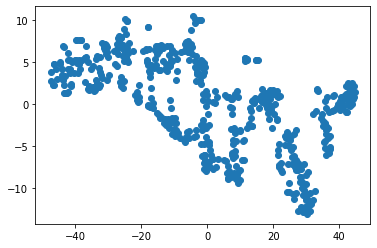

In [18]:
# Visualize the clusters
plt.scatter(crypto_df4['x'], crypto_df4['y'])
plt.show()

#### While the number of features was significantly reduced to 2, there are not distinct clusters in the data (as evidence by the scatterplot above).

## Cluster Analysis with k-Means

In [19]:
#initializing the list for inertia
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

# looking for the best k value
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)
    
#defining a dataframe to plot the elbow curve
elbow_data = {"k": k, "inertia":inertia}
elbow_df = pd.DataFrame(elbow_data)

elbow_df

,k,inertia
0,1,1064.000000
1,2,381.737314
2,3,170.704838
3,4,73.580015
4,5,44.579337
5,6,28.020238
6,7,18.384311
7,8,13.452014
8,9,10.330828
9,10,7.667994


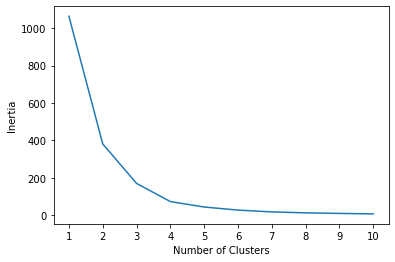

In [20]:
# plotting the elbow curve to find the best candidates for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### The ideal number of clusters apepars to be around 4; however, we were unable to determine distinct clusters in our previous analysis. Therefore, I do not have recommendations for clustering the crytpocurrencies based on this data.